In [34]:
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
filnames = {"chunked":"chunked-task-none-bias=False-normal-linear-decrease-ResNet32x32-stp=1-lr=0.0010",
"experts": "Experts-ResNet32x32", "sparse-linear": "sparse-task-none-bias=False-normal-linear-decrease-ResNet32x32-stp=1",
"sparse-nonlinear": "sparse-task-prelu-bias=True-normal-linear-decrease-ResNet32x32-stp=1-lr=0.0010"}
log_file = "split_cifar_csv"

In [38]:
df_list = []
for model, filename in filnames.items():
    for i in range(5):
        df = pd.read_csv("../../"+log_file+"/"+filename+f"/version_{i}/metrics.csv")
        df["Model"] = model
        df["Id"] = i
        df_list.append(df)

In [39]:
df = pd.concat(df_list)

In [66]:
df = df.reset_index()

In [41]:
df.groupby(["Model"]).describe()["Test Acc"]

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
chunked,5.0,0.73226,0.015423,0.7149,0.7177,0.7348,0.7467,0.7472
experts,5.0,0.75796,0.004223,0.7529,0.7551,0.7582,0.7598,0.7638
sparse-linear,5.0,0.74036,0.013917,0.7175,0.7396,0.7438,0.7462,0.7547
sparse-nonlinear,5.0,0.74222,0.007221,0.7362,0.7367,0.7405,0.7438,0.7539


In [42]:
df.groupby(["Model"]).describe()["Test Loss"]

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
chunked,5.0,0.870542,0.027114,0.833670,0.852047,0.882537,0.883440,0.901017
experts,5.0,0.833509,0.007401,0.822862,0.831934,0.832290,0.837838,0.842620
sparse-linear,5.0,0.859475,0.014300,0.850197,0.850680,0.853141,0.859099,0.884259
sparse-nonlinear,5.0,0.860827,0.021913,0.838501,0.843092,0.855330,0.879150,0.888063


In [47]:
(df.groupby(["Model", "Id"]).max()["Wall time"] - df.groupby(["Model", "Id"]).min()["Wall time"]).groupby("Model").mean()

Model
chunked             2304.0
experts             6886.4
sparse-linear       3686.4
sparse-nonlinear    4531.2
Name: Wall time, dtype: float64

In [49]:
(df.groupby(["Model", "Id"]).max()["step"] - df.groupby(["Model", "Id"]).min()["step"]).groupby("Model").describe()

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
chunked,5.0,13139.0,1089.954127,11699.0,12299.0,13499.0,14099.0,14099.0
experts,5.0,12839.0,934.344690,11999.0,12299.0,12599.0,12899.0,14399.0
sparse-linear,5.0,19139.0,3282.224855,13499.0,19499.0,19799.0,21299.0,21599.0
sparse-nonlinear,5.0,17519.0,2928.651567,14099.0,14699.0,18599.0,19799.0,20399.0


In [54]:
(df.groupby(["Model", "Id"]).max()["epoch"] - df.groupby(["Model", "Id"]).min()["epoch"]).groupby("Model").describe()

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
chunked,5.0,42.8,3.633180,38.0,40.0,44.0,46.0,46.0
experts,5.0,41.8,3.114482,39.0,40.0,41.0,42.0,47.0
sparse-linear,5.0,62.8,10.940750,44.0,64.0,65.0,70.0,71.0
sparse-nonlinear,5.0,57.4,9.762172,46.0,48.0,61.0,65.0,67.0


In [56]:
for c in df.columns:
    if c.startswith("grad"):
        continue
    print(c)

lr-Adam
step
Train Loss
Wall time
epoch
Val Loss
Val Acc
Val Acc 4
Val Acc 7
Val Acc 9
Val Acc 2
Val Acc 6
Val Acc 0
Val Acc 1
Val Acc 3
Val Acc 8
Val Acc 5
Test Acc 3
Connectivity
Cmin
Cmax
Test Loss
Test Acc
Params
Test Acc 1
Test Acc 8
Test Acc 2
Test Acc 6
Test Acc 7
Test Acc 5
Test Acc 4
Test Acc 9
Test Acc 0
Model
Id


In [57]:
df.groupby("Model").mean()["Params"]

Model
chunked             2535601.50
experts             4264263.00
sparse-linear       1675396.85
sparse-nonlinear    2528154.80
Name: Params, dtype: float64

In [62]:
df.groupby("Model").mean()[["Test Acc 0", "Test Acc 1", "Test Acc 2", "Test Acc 3", "Test Acc 4", "Test Acc 5", "Test Acc 6", "Test Acc 7", "Test Acc 8", "Test Acc 9"]]

,Test Acc 0,Test Acc 1,Test Acc 2,Test Acc 3,Test Acc 4,Test Acc 5,Test Acc 6,Test Acc 7,Test Acc 8,Test Acc 9
Model,,,,,,,,,,
chunked,0.7326,0.6862,0.7264,0.7238,0.7376,0.7488,0.7388,0.7218,0.7354,0.7712
experts,0.7548,0.7098,0.7778,0.7266,0.7656,0.7546,0.7732,0.7402,0.7738,0.8032
sparse-linear,0.7336,0.6862,0.7520,0.7136,0.7526,0.7452,0.7464,0.7446,0.7516,0.7778
sparse-nonlinear,0.7446,0.6898,0.7632,0.7122,0.7534,0.7458,0.7496,0.7316,0.7600,0.7720


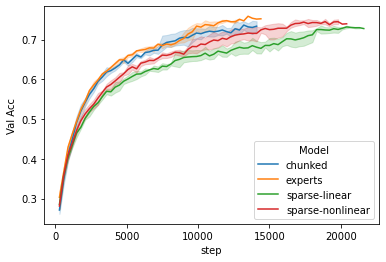

In [72]:
p = sns.lineplot(y="Val Acc", x="step", hue="Model", data=df)
# p.set_ylim([0.4, 1.0])